# RAPPORT tp3

## encadré par:
### - Amir Nakib
### - Fekhreddine Keddous
## realiser par:  
### - KEHMESS ahmed salem
### - MA xuanhao

- M2STDS

# introduction
Les  arbres  de  décision  sont  des  méthodes  d’apprentissage  non  paramétriques 
utilisées  pour  des  problèmes  de  classification  et  de  régression.  L’objectif  est  de 
créer  un  modèle  qui  prédit  les  valeurs  de  la  variable  cible,  en  se  basant  sur  un 
ensemble  de  séquences  de  règles  de  décision  déduites  à  partir  des  données 
d’apprentissage. L’arbre approxime donc la cible par une succession de règles if-
then-else. Ce paradigme s’applique aussi bien à des données catégorielles qu’à des 
données  numériques.  Plus  l’arbre  généré  est  complexe,  mieux  le  modèle  « 
explique  »  les  donnés  d’apprentissage  mais  plus  le  risque  de  sur-apprentissage 
(over-fitting) est élevé.

Les arbres de décision ont plusieurs avantages qui les rendent intéressants dans 
des contextesoù il est utile de comprendre la séquence de décisions prise par le 
modèle : 

- Ils sont simples à comprendre et à visualiser. 
- Ils nécessitent peu de préparation des données (normalisation, etc.). 
- Le coût d’utilisation des arbres est logarithmique. 
- Ils sont capables d’utiliser des données catégorielles et numériques. 
- Ils sont capables de traiter des problèmes multi-classe. 
- Modèle en boîte blanche : le résultat est facile à conceptualiser et à visualiser. 
#### Ces modèles présentent néanmoins deux désavantages majeurs : 
- Sur-apprentissage  :  parfois  les  arbres  générés  sont  trop  complexes  et 
    généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur 
    maximale (max_depth) et nombre minimal d’exemples par feuille 
    (min_samples_leaf) permet d’éviter ce problème. 
- Il peut arriver que les arbres générés ne soient pas équilibrés (ce qui implique 
    que le temps de parcours n’est plus logarithmique). Il est donc recommandé 
    d’ajuster la base de données avant la construction, pour éviter qu’une classe 
    domine largement les autres (en termes de nombre d’exemples 
    d’apprentissage).

In [134]:
from sklearn import tree 
import pandas as pd
import matplotlib.pyplot as plt

In [207]:


df = pd.read_csv ('car.csv')
print (df)

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]


In [208]:
df.columns =['buying', 'maint','doors','persons','lug_boot','safety','Class Values']

In [209]:
df

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [210]:
car_data = pd.DataFrame(df, columns = ['buying', 'maint','doors','persons','lug_boot','safety'])

In [211]:
car_data

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [212]:
car_target1 = pd.DataFrame(df, columns = ['Class Values'])

In [213]:
car_target1

,Class Values
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1722,good
1723,vgood
1724,unacc
1725,good


# Classification des données CAR:

# converssion de data set:
pour modifier les valeurs pour chaque attribut en valeur numerique;

##### 'Class Values':
unacc, acc, good, vgood = 1,2,3,4
###### buying: 
vhigh, high, med, low. = 4,3,2,1
###### maint: 
vhigh, high, med, low. = 4,3,2,1
###### doors: 
2, 3, 4, 5more. = 2, 4, 5
###### persons: 
2, 4, more. = 2, 4, 5
###### lug_boot: 
small, med, big. = 1, 2,3
###### safety: 
low, med, high. = 1, 2,3

In [214]:
car_data['buying']=car_data['buying'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})

In [215]:
car_data['maint']= car_data['maint'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})

In [216]:
car_data['lug_boot']= car_data['lug_boot'].map({'small':1, 'med':2, 'big':3})

In [217]:
car_data['safety']= car_data['safety'].map({'low':1, 'med':2, 'high':3})

In [218]:
car_data['doors']= car_data['doors'].map({'2':2,'3': 3,'4': 4,'5more':5})

In [219]:
car_data['persons']= car_data['persons'].map({'2':2,'4':4,'more':5})

In [220]:
car_data

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,2
1,4,4,2,2,1,3
2,4,4,2,2,2,1
3,4,4,2,2,2,2
4,4,4,2,2,2,3
...,...,...,...,...,...,...
1722,1,1,5,5,2,2
1723,1,1,5,5,2,3
1724,1,1,5,5,3,1
1725,1,1,5,5,3,2


In [221]:
car_target['Class Values']=car_target1['Class Values'].map({'unacc':1, 'acc':2, 'good':3, 'vgood':4 })

In [222]:
car_target

,Class Values
0,1
1,1
2,1
3,1
4,1
...,...
1722,3
1723,4
1724,1
1725,3


#### Calculer les statistiques (moyenne et écart-type) des variables 

In [128]:
import numpy as np
for i in car_data.columns:
    print('__________________________')
    print('moyen et écart-type '+ i )
    print('moyen = ' ,np.mean(car_data[i]))
    print('écart-type = ' ,np.std(car_data[i]))

__________________________
moyen et écart-type buying
moyen =  2.499131441806601
écart-type =  1.1177746672791624
__________________________
moyen et écart-type maint
moyen =  2.499131441806601
écart-type =  1.1177746672791613
__________________________
moyen et écart-type doors
moyen =  3.500868558193399
écart-type =  1.1177746672791624
__________________________
moyen et écart-type persons
moyen =  3.667631731325999
écart-type =  1.2469350063745335
__________________________
moyen et écart-type lug_boot
moyen =  2.0005790387955993
écart-type =  0.8163781712226682
__________________________
moyen et écart-type safety
moyen =  2.0005790387955993
écart-type =  0.8163781712226681


#### Combien y a-t-il d’exemples de chaque classe ?

In [129]:
bb,cc=np.unique(car_target,return_counts=True)
print(cc)
    

[1209  384   69   65]


##### le nombre d'exemple dans chaque classe:
unacc = 1209; 
acc = 384 ; 
good = 69 ; 
vgood = 65  

Avant de construire le modèle, séparons le jeu de données en deux : 70% pour 
l’apprentissage, 30% pour le test.

In [131]:
from sklearn.model_selection import train_test_split 
X_train,  X_test,  y_train,  y_test  =  train_test_split(car_data,  car_target,  train_size=0.7, 
random_state=0) 

Nous pouvons désormais construire un arbre de décision sur ces données :

In [154]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier() 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Une  fois  l’apprentissage  terminé,  nous  pouvons  visualiser  l’arbre,  soit  avec 
matplotlib en passant par la méthode plot_tree. Par exemple, avec matplotlib :

[Text(0.6209821428571428, 0.9615384615384616, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1208\nvalue = [851, 268, 48, 41]'),
 Text(0.6066964285714286, 0.8846153846153846, 'gini = 0.0\nsamples = 402\nvalue = [402, 0, 0, 0]'),
 Text(0.6352678571428572, 0.8846153846153846, 'X[3] <= 3.0\ngini = 0.573\nsamples = 806\nvalue = [449, 268, 48, 41]'),
 Text(0.6209821428571428, 0.8076923076923077, 'gini = 0.0\nsamples = 265\nvalue = [265, 0, 0, 0]'),
 Text(0.6495535714285714, 0.8076923076923077, 'X[0] <= 2.5\ngini = 0.625\nsamples = 541\nvalue = [184, 268, 48, 41]'),
 Text(0.4133928571428571, 0.7307692307692307, 'X[1] <= 2.5\ngini = 0.65\nsamples = 264\nvalue = [37, 138, 48, 41]'),
 Text(0.21607142857142858, 0.6538461538461539, 'X[5] <= 2.5\ngini = 0.694\nsamples = 130\nvalue = [8, 43, 48, 31]'),
 Text(0.08571428571428572, 0.5769230769230769, 'X[4] <= 1.5\ngini = 0.552\nsamples = 69\nvalue = [4, 34, 31, 0]'),
 Text(0.04285714285714286, 0.5, 'X[2] <= 2.5\ngini = 0.278\nsamples = 24\nvalue = [4, 20, 0, 

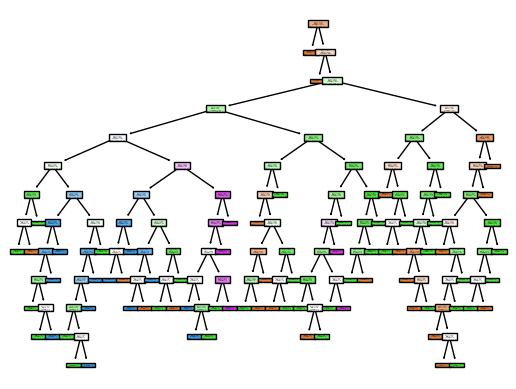

In [135]:
tree.plot_tree(clf, filled=True)

Une fois le modèle construit, il est possible de l’utiliser pour la prédiction sur de 
nouvelles données : 

In [136]:
clf.predict(X_test)

array([2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1,
       1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 4, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 4, 1,

In [137]:
clf.score(X_test, y_test)

0.9807321772639692

Changez  les  valeurs  de  parametres  max_depth  et  min_samples_leaf.  Que  constatez-
vous ? 
Voir la documentation des arbres de décision. Le paramètre max_depth est un seuil 
sur  la  profondeur  maximale  de  l’arbre.  Le  paramètre  min_samples_leaf  donne  le 
nombre minimal d’échantillons dans un nœud feuille. Ils permettent de mettre des 
contraintes  sur  la  construction  de  l’arbre  et  donc  de  contrôler  indirectement  le 
phénomène de sur-apprentissage. 

In [144]:
clf1 = tree.DecisionTreeClassifier(max_depth = 3)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1208\nvalue = [851, 268, 48, 41]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 402\nvalue = [402, 0, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 3.0\ngini = 0.573\nsamples = 806\nvalue = [449, 268, 48, 41]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 265\nvalue = [265, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\ngini = 0.625\nsamples = 541\nvalue = [184, 268, 48, 41]'),
 Text(0.5, 0.125, 'gini = 0.65\nsamples = 264\nvalue = [37, 138, 48, 41]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 277\nvalue = [147, 130, 0, 0]')]

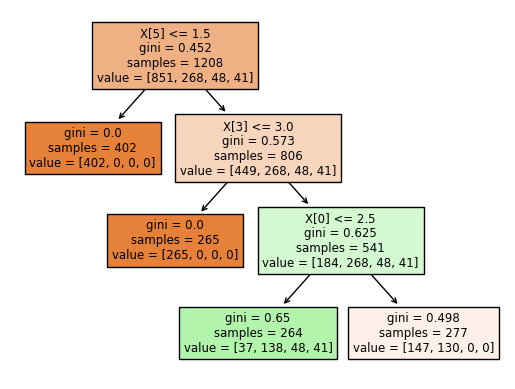

In [145]:
tree.plot_tree(clf1, filled=True)

In [146]:
clf1.predict(X_test)

array([2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1,

In [147]:
clf1.score(X_test, y_test)

0.7996146435452793

on constate que apres avoir changer le max_depth = 3 en diminien le profondeur de l'arbre on voit que le score a duminier de 98% a presque 80%

In [148]:
clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 20) 
clf2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

[Text(0.47413793103448276, 0.9375, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1208\nvalue = [851, 268, 48, 41]'),
 Text(0.4396551724137931, 0.8125, 'gini = 0.0\nsamples = 402\nvalue = [402, 0, 0, 0]'),
 Text(0.5086206896551724, 0.8125, 'X[3] <= 3.0\ngini = 0.573\nsamples = 806\nvalue = [449, 268, 48, 41]'),
 Text(0.47413793103448276, 0.6875, 'gini = 0.0\nsamples = 265\nvalue = [265, 0, 0, 0]'),
 Text(0.5431034482758621, 0.6875, 'X[0] <= 2.5\ngini = 0.625\nsamples = 541\nvalue = [184, 268, 48, 41]'),
 Text(0.27586206896551724, 0.5625, 'X[1] <= 2.5\ngini = 0.65\nsamples = 264\nvalue = [37, 138, 48, 41]'),
 Text(0.13793103448275862, 0.4375, 'X[5] <= 2.5\ngini = 0.694\nsamples = 130\nvalue = [8, 43, 48, 31]'),
 Text(0.06896551724137931, 0.3125, 'X[4] <= 1.5\ngini = 0.552\nsamples = 69\nvalue = [4, 34, 31, 0]'),
 Text(0.034482758620689655, 0.1875, 'gini = 0.278\nsamples = 24\nvalue = [4, 20, 0, 0]'),
 Text(0.10344827586206896, 0.1875, 'X[0] <= 1.5\ngini = 0.429\nsamples = 45\nvalue = [0, 14, 31,

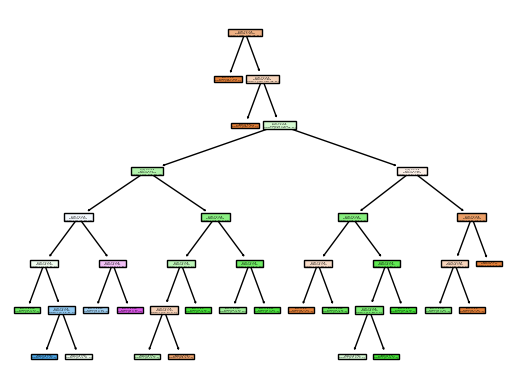

In [149]:
tree.plot_tree(clf2, filled=True)

In [150]:
clf2.predict(X_test)

array([2, 1, 1, 1, 1, 4, 1, 1, 4, 2, 1, 1, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1,
       1, 1, 2, 4, 2, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 4, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 4, 1,

In [152]:
clf2.score(X_test, y_test)

0.9364161849710982

Voici l’arbre obtenu avec min_samples_leaf=20. Il a plus d’éléments dans les feuilles, 
donc moins de nœuds et l’arbre est moins profond. avec un score de 93%

## Question : 
Le problème ici étant particulièrement simple, refaites une division 
apprentissage/test avec 5% des données en apprentissage et 95% test. 
Calculez le taux d’éléments mal classifiés sur l’ensemble de test. 
Faites  varier  (ou  mieux,  réalisez  une  recherche  par  grille  avec  GridSearchCV)  les 
valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur 
ce score. 

In [153]:
X_train,  X_test,  y_train,  y_test  =  train_test_split(car_data,  car_target,  train_size=0.05, 
random_state=0) 


In [155]:
param_dict= {
    "max_depth":range(1,10),
    "min_samples_leaf":range(1,20)
}

In [156]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(clf, param_grid= param_dict , cv = 10 , n_jobs= 5 )
grid.fit(X_train,y_train)

/home/etudiant/anaconda3/envs/kehmess/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)})

In [157]:
grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

In [158]:
grid.best_score_

0.8472222222222221

In [159]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

In [162]:
clf3 = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)

[Text(0.25, 0.9285714285714286, 'X[3] <= 3.0\ngini = 0.441\nsamples = 86\nvalue = [61, 20, 1, 4]'),
 Text(0.19117647058823528, 0.7857142857142857, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0, 0]'),
 Text(0.3088235294117647, 0.7857142857142857, 'X[5] <= 1.5\ngini = 0.548\nsamples = 59\nvalue = [34, 20, 1, 4]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0]'),
 Text(0.36764705882352944, 0.6428571428571429, 'X[0] <= 1.5\ngini = 0.599\nsamples = 40\nvalue = [15, 20, 1, 4]'),
 Text(0.17647058823529413, 0.5, 'X[1] <= 3.5\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 0, 4]'),
 Text(0.11764705882352941, 0.35714285714285715, 'X[5] <= 2.5\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 0, 4]'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4]'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [

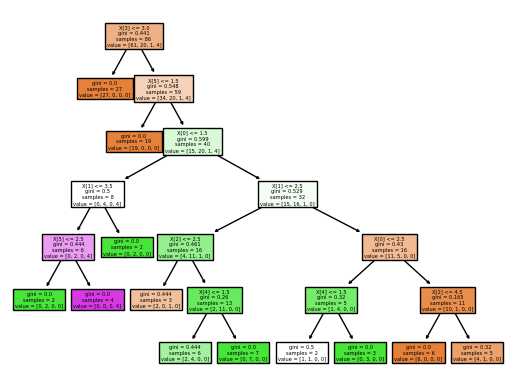

In [164]:
tree.plot_tree(clf3, filled=True)

In [165]:
clf3.score(X_test, y_test)

0.8531383302864107

# III/ Affichage de la surface de décision
Pour une paire d’attributs, c’est-à-dire pour des observations en deux dimensions, 
nous  pouvons  visualiser  la  surface  de  décision  en  2  dimensions.  D’abord  on 
discrétise le domaine bidimensionnel avec un pas constant et ensuite on évalue le 
modèle sur chaque point de la grille. 
Dans cet exemple, nous ne gardons que la longueur et la largeur des pétales.

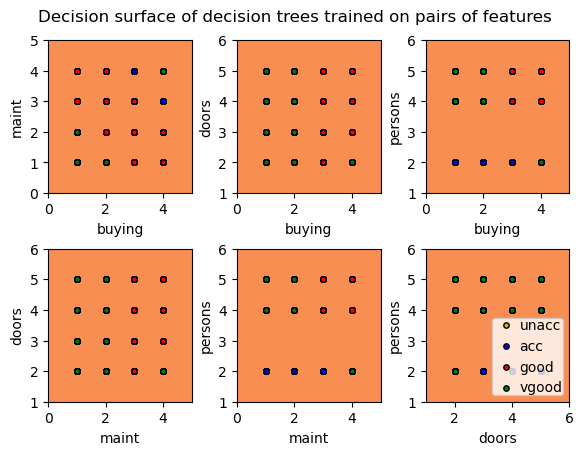

In [237]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 4
plot_colors = "ybrg"
plot_step = 0.02
tab= ['unacc', 'acc', 'good', 'vgood']

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3],[2, 3]]):
    # We only take the two corresponding features
    X = car_data.values[:, pair]
    y = car_target.values

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=car_data.columns[pair[0]],
        ylabel=car_data.columns[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=tab[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")
